# Quora Duplicate Question Identifier

In [563]:
import smtplib
from matplotlib import style
import seaborn as sns
sns.set(style='ticks', palette='RdBu')
import pandas as pd
import numpy as np
import time
import datetime 
%matplotlib inline
import matplotlib.pyplot as plt
from subprocess import check_output
pd.options.display.max_colwidth = 1000
from time import gmtime, strftime
Time_now = strftime("%Y-%m-%d %H:%M:%S", gmtime())
import timeit
start = timeit.default_timer()
pd.options.display.max_rows = 100
from wordcloud import WordCloud
import sqlite3
import nltk
import string
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')
from sklearn.feature_selection.univariate_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random
import itertools
import sys
import os
import argparse
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
import six
from abc import ABCMeta
from scipy import sparse
from scipy.sparse import issparse
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_X_y, check_array
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.preprocessing import normalize, binarize, LabelBinarizer
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV, SelectKBest
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn import svm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

path = 'C:/Users/rmalshe/Desktop/CareerDevelopment/PROGRAMMING_LANGUAGES/iPythonNoteBooks/QUORA/'
start = time.time()

# Read the data

In [564]:
data = pd.read_csv(path + 'questions.csv', encoding='ISO-8859-1')
df = data
df.head().T

,0,1,2,3,4
id,0,1,2,3,4
qid1,1,3,5,7,9
qid2,2,4,6,8,10
question1,What is the step by step guide to invest in share market in india?,What is the story of Kohinoor (Koh-i-Noor) Diamond?,How can I increase the speed of my internet connection while using a VPN?,Why am I mentally very lonely? How can I solve it?,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?"
question2,What is the step by step guide to invest in share market?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,How can Internet speed be increased by hacking through DNS?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",Which fish would survive in salt water?
is_duplicate,0,0,0,0,0


# Describe the data

In [565]:
data.columns

Index([u'id', u'qid1', u'qid2', u'question1', u'question2', u'is_duplicate'], dtype='object')

In [566]:
data.head(n=2)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0


# Categorical features

In [567]:
categorical_features = (data.select_dtypes(include=['object']).columns.values)
categorical_features

array([u'id', u'qid1', u'qid2', u'question1', u'question2'], dtype=object)

# Numerical Features

In [568]:
numerical_features = data.select_dtypes(include = ['float64', 'int64']).columns.values
numerical_features

array([u'is_duplicate'], dtype=object)

In [569]:
data = data.dropna()
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['question1_S']= ''
data['question2_S']= ''
data['question1_S']= ''
data['question2_S']= ''

data['question1_S'] = data['question1'].str.lower().str.split()
data['question2_S'] = data['question2'].str.lower().str.split()
data['question1_S'] = data['question1_S'].apply(lambda x: [item for item in x if item not in stop])
data['question2_S'] = data['question2_S'].apply(lambda x: [item for item in x if item not in stop])

#data['Q1_CORRECT']= ''
#data['Q2_CORRECT']= ''
#data['Q1_SENTENCES']= ''
#data['Q2_SENTENCES']= ''
#data['Q1_NOUNCOUNT']= ''
#data['Q2_NOUNCOUNT']= ''
#data['Q1_NOUNS']= ''
#data['Q2_NOUNS']= ''
#data['Q1_WORDCOUNTS']= ''
#data['Q2_WORDCOUNTS']= ''
#data['Q1_POLARITY']= ''
#data['Q2_POLARITY']= ''
#data['Q1_SUBJECTIVITY']= ''
#data['Q2_SUBJECTIVITY']= ''
data['Q1_WORDS']= ''
data['Q2_WORDS']= ''
#data['Q1_TAGS']= ''
#data['Q2_TAGS']= ''
data['Q1_Q2_FUZZ_RATIO']= ''
data['INTERSECTION']= ''
data['UNION']= ''

data['Q1_UNION_FUZZ_RATIO']= ''
data['Q2_UNION_FUZZ_RATIO']= ''
data['Q1_INTERSECTION_FUZZ_RATIO']= ''
data['Q2_INTERSECTION_FUZZ_RATIO']= ''
data['INTERSECTION_UNION_FUZZ_RATIO'] = ''

data['Q1_WORDS_S']= ''
data['Q2_WORDS_S']= ''

data['Q1_Q2_FUZZ_RATIO_S']= ''
data['INTERSECTION_S']= ''
data['UNION_S']= ''

data['Q1_UNION_FUZZ_RATIO_S']= ''
data['Q2_UNION_FUZZ_RATIO_S']= ''
data['Q1_INTERSECTION_FUZZ_RATIO_S']= ''
data['Q2_INTERSECTION_FUZZ_RATIO_S']= ''
data['INTERSECTION_UNION_FUZZ_RATIO_S'] = ''


data.shape[0]
import warnings
warnings.filterwarnings('ignore')

data = data.sample(frac=0.001)
data = data.reset_index()

In [570]:
data.head()

,index,id,qid1,qid2,question1,question2,is_duplicate,question1_S,question2_S,Q1_WORDS,...,Q1_WORDS_S,Q2_WORDS_S,Q1_Q2_FUZZ_RATIO_S,INTERSECTION_S,UNION_S,Q1_UNION_FUZZ_RATIO_S,Q2_UNION_FUZZ_RATIO_S,Q1_INTERSECTION_FUZZ_RATIO_S,Q2_INTERSECTION_FUZZ_RATIO_S,INTERSECTION_UNION_FUZZ_RATIO_S
0,44710,44708,89028,89029,What are examples of demographic factors?,What are some examples of demographic factors?,1,"[examples, demographic, factors?]","[examples, demographic, factors?]",,...,,,,,,,,,,
1,222552,222546,438656,438657,What are 5 scientific challenges faced by big cities due to the urban congestion?,What are 5 scientific challenges faced by big cities due to urbanization?,1,"[5, scientific, challenges, faced, big, cities, due, urban, congestion?]","[5, scientific, challenges, faced, big, cities, due, urbanization?]",,...,,,,,,,,,,
2,228336,228329,449965,449966,How is ETC at IIEST Shibpur?,Can I get IIEST Shibpur IT?,0,"[etc, iiest, shibpur?]","[get, iiest, shibpur, it?]",,...,,,,,,,,,,
3,74668,74665,148372,148373,Why does Vietnam have a much advanced political system than India?,Why does academia have so much politics?,0,"[vietnam, much, advanced, political, system, india?]","[academia, much, politics?]",,...,,,,,,,,,,
4,111504,111501,221094,221095,How does AdMob know if your app violates their ToS?,What is LOR 6 or LOR 7 grade in Deutsche Bank?,0,"[admob, know, app, violates, tos?]","[lor, 6, lor, 7, grade, deutsche, bank?]",,...,,,,,,,,,,


In [571]:
nrows = data.shape[0]

for index in range(nrows):
    
    mystring = data['question1'][index]
    mystring = mystring.encode('ascii', 'ignore').decode('ascii')
    sentence1 = mystring

    #mystring_S = data['question1_S'][index]
    #mystring_S = mystring_S.encode('ascii', 'ignore').decode('ascii')
    #sentence1_S = mystring_S

    mystring = data['question2'][index]
    mystring = mystring.encode('ascii', 'ignore').decode('ascii')
    sentence2 = mystring

    #mystring_S = data['question2_S'][index]
    #mystring_S = mystring_S.encode('ascii', 'ignore').decode('ascii')
    #sentence2_S = mystring_S

    
    sentence1_tb = TextBlob(sentence1)
    #sentence1_tb_S = TextBlob(sentence1_S)
    #sentence1_tb_correct = sentence1_tb.correct()
    #data['Q1_CORRECT'][index] = str(sentence1_tb_correct)
    #data['Q1_SENTENCES'][index] = str(sentence1_tb.sentences)
    #data['Q1_NOUNS'][index] = sentence1_tb.noun_phrases
    #data['Q1_NOUNCOUNT'][index] = sentence1_tb.np_counts
    #data['Q1_WORDCOUNTS'][index] = sentence1_tb.word_counts
    #data['Q1_POLARITY'][index] = sentence1_tb.polarity
    #data['Q1_SUBJECTIVITY'][index] = sentence1_tb.subjectivity
    data['Q1_WORDS'][index] = sentence1_tb.words
    data['Q1_WORDS_S'][index] = data['question1_S'][index]
    #data['Q1_TAGS'][index] = sentence1_tb.tags
    
    sentence2_tb = TextBlob(sentence2)
    #sentence2_tb_S = TextBlob(sentence2_S)
    #sentence2_tb_correct = sentence2_tb.correct()
    #data['Q2_CORRECT'][index] = str(sentence2_tb_correct)
    #data['Q2_SENTENCES'][index] = str(sentence2_tb.sentences)
    #data['Q2_NOUNS'][index] = sentence2_tb.noun_phrases
    #data['Q2_NOUNCOUNT'][index] = sentence2_tb.np_counts
    #data['Q2_WORDCOUNTS'][index] = sentence2_tb.word_counts
    #data['Q2_POLARITY'][index] = sentence2_tb.polarity
    #data['Q2_SUBJECTIVITY'][index] = sentence2_tb.subjectivity
    data['Q2_WORDS'][index] = sentence2_tb.words
    data['Q2_WORDS_S'][index] = data['question2_S'][index]
    #data['Q2_TAGS'][index] = sentence2_tb.tags
    
    data['Q1_Q2_FUZZ_RATIO'][index] = fuzz.ratio(sentence1, sentence2)
    data['INTERSECTION'][index] =  set(data['Q1_WORDS'][index]).intersection(data['Q2_WORDS'][index]) 
    data['UNION'][index] =  set(list(data['Q1_WORDS'][index]) + list(data['Q2_WORDS'][index]))
    data['Q1_UNION_FUZZ_RATIO'][index] = int(fuzz.ratio(sentence1, data['UNION'][index]))
    data['Q2_UNION_FUZZ_RATIO'][index] = int(fuzz.ratio(sentence2, data['UNION'][index]))
    data['Q1_INTERSECTION_FUZZ_RATIO'][index] = int(fuzz.ratio(sentence1, data['INTERSECTION'][index]))
    data['Q2_INTERSECTION_FUZZ_RATIO'][index]= int(fuzz.ratio(sentence2, data['INTERSECTION'][index]))
    data['INTERSECTION_UNION_FUZZ_RATIO'][index] = int(fuzz.ratio(data['UNION'][index], data['INTERSECTION'][index]))
    #data['Q2_TAGS'][index] = sentence2_tb.tags

    data['Q1_Q2_FUZZ_RATIO_S'][index] = fuzz.ratio(sentence1, sentence2)
    data['INTERSECTION_S'][index] =  set(data['Q1_WORDS_S'][index]).intersection(data['Q2_WORDS_S'][index]) 
    data['UNION_S'][index] =  set(list(data['Q1_WORDS_S'][index]) + list(data['Q2_WORDS_S'][index]))
    data['Q1_UNION_FUZZ_RATIO_S'][index] = int(fuzz.ratio(sentence1, data['UNION_S'][index]))
    data['Q2_UNION_FUZZ_RATIO_S'][index] = int(fuzz.ratio(sentence2, data['UNION_S'][index]))
    data['Q1_INTERSECTION_FUZZ_RATIO_S'][index] = int(fuzz.ratio(sentence1, data['INTERSECTION_S'][index]))
    data['Q2_INTERSECTION_FUZZ_RATIO_S'][index]= int(fuzz.ratio(sentence2, data['INTERSECTION_S'][index]))
    data['INTERSECTION_UNION_FUZZ_RATIO_S'][index] = int(fuzz.ratio(data['UNION_S'][index], data['INTERSECTION_S'][index]))


In [572]:
data.head(1).T

,0
index,44710
id,44708
qid1,89028
qid2,89029
question1,What are examples of demographic factors?
question2,What are some examples of demographic factors?
is_duplicate,1
question1_S,"[examples, demographic, factors?]"
question2_S,"[examples, demographic, factors?]"
Q1_WORDS,"[What, are, examples, of, demographic, factors]"


In [573]:
data.columns.values

array(['index', u'id', u'qid1', u'qid2', u'question1', u'question2',
       u'is_duplicate', 'question1_S', 'question2_S', 'Q1_WORDS',
       'Q2_WORDS', 'Q1_Q2_FUZZ_RATIO', 'INTERSECTION', 'UNION',
       'Q1_UNION_FUZZ_RATIO', 'Q2_UNION_FUZZ_RATIO',
       'Q1_INTERSECTION_FUZZ_RATIO', 'Q2_INTERSECTION_FUZZ_RATIO',
       'INTERSECTION_UNION_FUZZ_RATIO', 'Q1_WORDS_S', 'Q2_WORDS_S',
       'Q1_Q2_FUZZ_RATIO_S', 'INTERSECTION_S', 'UNION_S',
       'Q1_UNION_FUZZ_RATIO_S', 'Q2_UNION_FUZZ_RATIO_S',
       'Q1_INTERSECTION_FUZZ_RATIO_S', 'Q2_INTERSECTION_FUZZ_RATIO_S',
       'INTERSECTION_UNION_FUZZ_RATIO_S'], dtype=object)

In [574]:
#data.Q1_POLARITY = pd.to_numeric(data.Q1_POLARITY)
#data.Q2_POLARITY = pd.to_numeric(data.Q2_POLARITY)
#data.Q1_SUBJECTIVITY = pd.to_numeric(data.Q1_SUBJECTIVITY)
#data.Q2_SUBJECTIVITY = pd.to_numeric(data.Q2_SUBJECTIVITY)
data.Q1_Q2_FUZZ_RATIO = pd.to_numeric(data.Q1_Q2_FUZZ_RATIO)
data.Q1_UNION_FUZZ_RATIO = pd.to_numeric(data.Q1_UNION_FUZZ_RATIO)
data.Q2_UNION_FUZZ_RATIO =  pd.to_numeric(data.Q2_UNION_FUZZ_RATIO)
data.Q1_INTERSECTION_FUZZ_RATIO =  pd.to_numeric(data.Q1_INTERSECTION_FUZZ_RATIO)
data.Q2_INTERSECTION_FUZZ_RATIO =  pd.to_numeric(data.Q2_INTERSECTION_FUZZ_RATIO)
data.INTERSECTION_UNION_FUZZ_RATIO =  pd.to_numeric(data.INTERSECTION_UNION_FUZZ_RATIO)

data.Q1_Q2_FUZZ_RATIO_S = pd.to_numeric(data.Q1_Q2_FUZZ_RATIO_S)
data.Q1_UNION_FUZZ_RATIO_S = pd.to_numeric(data.Q1_UNION_FUZZ_RATIO_S)
data.Q2_UNION_FUZZ_RATIO_S =  pd.to_numeric(data.Q2_UNION_FUZZ_RATIO_S)
data.Q1_INTERSECTION_FUZZ_RATIO_S =  pd.to_numeric(data.Q1_INTERSECTION_FUZZ_RATIO_S)
data.Q2_INTERSECTION_FUZZ_RATIO_S =  pd.to_numeric(data.Q2_INTERSECTION_FUZZ_RATIO_S)
data.INTERSECTION_UNION_FUZZ_RATIO_S =  pd.to_numeric(data.INTERSECTION_UNION_FUZZ_RATIO_S)

In [575]:
data2 = data[['id', 
                'is_duplicate',
                'Q1_Q2_FUZZ_RATIO',
                'Q1_UNION_FUZZ_RATIO',
                'Q2_UNION_FUZZ_RATIO', 
                'Q1_INTERSECTION_FUZZ_RATIO',
                'Q2_INTERSECTION_FUZZ_RATIO', 
                'INTERSECTION_UNION_FUZZ_RATIO', 

                'Q1_Q2_FUZZ_RATIO_S',
                'Q1_UNION_FUZZ_RATIO_S',
                'Q2_UNION_FUZZ_RATIO_S', 
                'Q1_INTERSECTION_FUZZ_RATIO_S',
                'Q2_INTERSECTION_FUZZ_RATIO_S', 
                'INTERSECTION_UNION_FUZZ_RATIO_S']]
#data2

numerical_features = data2.select_dtypes(include = ['float64', 'int64']).columns.values
numerical_features

array([u'is_duplicate', 'Q1_Q2_FUZZ_RATIO', 'Q1_UNION_FUZZ_RATIO',
       'Q2_UNION_FUZZ_RATIO', 'Q1_INTERSECTION_FUZZ_RATIO',
       'Q2_INTERSECTION_FUZZ_RATIO', 'INTERSECTION_UNION_FUZZ_RATIO',
       'Q1_Q2_FUZZ_RATIO_S', 'Q1_UNION_FUZZ_RATIO_S',
       'Q2_UNION_FUZZ_RATIO_S', 'Q1_INTERSECTION_FUZZ_RATIO_S',
       'Q2_INTERSECTION_FUZZ_RATIO_S', 'INTERSECTION_UNION_FUZZ_RATIO_S'], dtype=object)

In [576]:
data2.head(5)

,id,is_duplicate,Q1_Q2_FUZZ_RATIO,Q1_UNION_FUZZ_RATIO,Q2_UNION_FUZZ_RATIO,Q1_INTERSECTION_FUZZ_RATIO,Q2_INTERSECTION_FUZZ_RATIO,INTERSECTION_UNION_FUZZ_RATIO,Q1_Q2_FUZZ_RATIO_S,Q1_UNION_FUZZ_RATIO_S,Q2_UNION_FUZZ_RATIO_S,Q1_INTERSECTION_FUZZ_RATIO_S,Q2_INTERSECTION_FUZZ_RATIO_S,INTERSECTION_UNION_FUZZ_RATIO_S
0,44708,1,94,43,42,47,45,94,94,48,45,48,45,100
1,222546,1,91,37,40,41,43,81,91,25,29,39,41,78
2,228329,0,65,30,37,33,44,48,65,20,26,14,14,38
3,74665,0,60,35,21,23,30,41,60,37,20,18,19,24
4,111501,0,29,19,27,0,0,0,29,32,27,0,0,0


In [577]:
df_jobtype = pd.pivot_table(data,
                            values = [
        #                            'Q1_POLARITY', 
        #                            'Q2_POLARITY', 
        #                            'Q1_SUBJECTIVITY',
        #                            'Q2_SUBJECTIVITY', 
                                    'Q1_Q2_FUZZ_RATIO',
                                    'Q1_UNION_FUZZ_RATIO',
                                    'Q2_UNION_FUZZ_RATIO', 
                                    'Q1_INTERSECTION_FUZZ_RATIO',
                                    'Q2_INTERSECTION_FUZZ_RATIO', 
                                    'INTERSECTION_UNION_FUZZ_RATIO', 

                                    'Q1_Q2_FUZZ_RATIO_S',
                                    'Q1_UNION_FUZZ_RATIO_S',
                                    'Q2_UNION_FUZZ_RATIO_S', 
                                    'Q1_INTERSECTION_FUZZ_RATIO_S',
                                    'Q2_INTERSECTION_FUZZ_RATIO_S', 
                                    'INTERSECTION_UNION_FUZZ_RATIO_S'],
                            index = ['is_duplicate'],
                            columns = [],
                            aggfunc=[np.mean, np.median, np.std], 
                            margins=True).fillna('')

#cm = sns.light_palette("green", as_cmap=True)
cm = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True, center="light")
df_jobtype.T.style.background_gradient(cmap=cm)

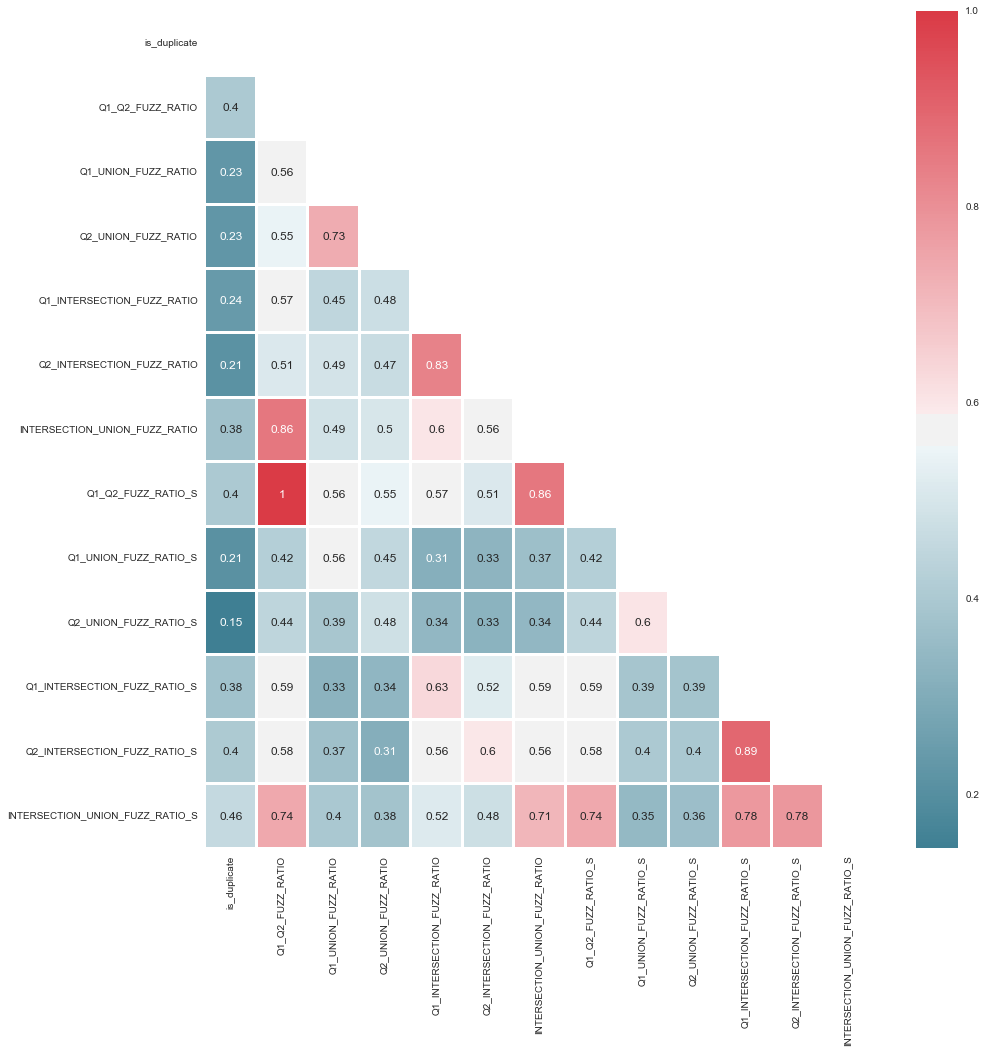

In [578]:
def heat_map(corrs_mat):
    sns.set(style="white")
    f, ax = plt.subplots(figsize=(15, 15))
    mask = np.zeros_like(corrs_mat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True 
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corrs_mat, mask=mask, cmap=cmap, ax=ax, linecolor='white', linewidths=2, annot=True)

corr_df = data2.corr()    
heat_map(corr_df)  

# Machine learning

In [579]:
x, Y = data2.drop('is_duplicate', axis=1), data2['is_duplicate']


classifiers = [('RandomForestClassifierG', RandomForestClassifier(n_jobs=-1, criterion='gini')),
               ('RandomForestClassifierE', RandomForestClassifier(n_jobs=-1, criterion='entropy')),
               ('AdaBoostClassifier', AdaBoostClassifier()),
               ('ExtraTreesClassifier', ExtraTreesClassifier(n_jobs=-1)),
               ('DecisionTreeClassifier', DecisionTreeClassifier()),
               ('LogisticRegression', LogisticRegression()),
               ('MultinomialNB', MultinomialNB(alpha=0.001)), 
               ('SGDClassifier', SGDClassifier(loss='modified_huber', n_iter=5, random_state=0, shuffle=True)),
               ('GradientBoostingClassifier', GradientBoostingClassifier()),
              ]
allscores = []
for name, classifier in classifiers:
    scores = []
    for i in range(20): # three runs
        roc = cross_val_score(classifier, x, Y)
        scores.extend(list(roc))
    scores = np.array(scores)
    print(name, scores.mean())
    new_data = [(name, score) for score in scores]
    allscores.extend(new_data)
    

('RandomForestClassifierG', 0.65945822358794282)
('RandomForestClassifierE', 0.65549275680421437)
('AdaBoostClassifier', 0.64347380743342131)
('ExtraTreesClassifier', 0.65927714369329815)
('DecisionTreeClassifier', 0.68139266900790163)
('LogisticRegression', 0.67083699151302301)
('MultinomialNB', 0.59174714661984196)
('SGDClassifier', 0.38118232367573907)
('GradientBoostingClassifier', 0.64346100380450699)


[None, None, None, None, None, None, None, None, None]

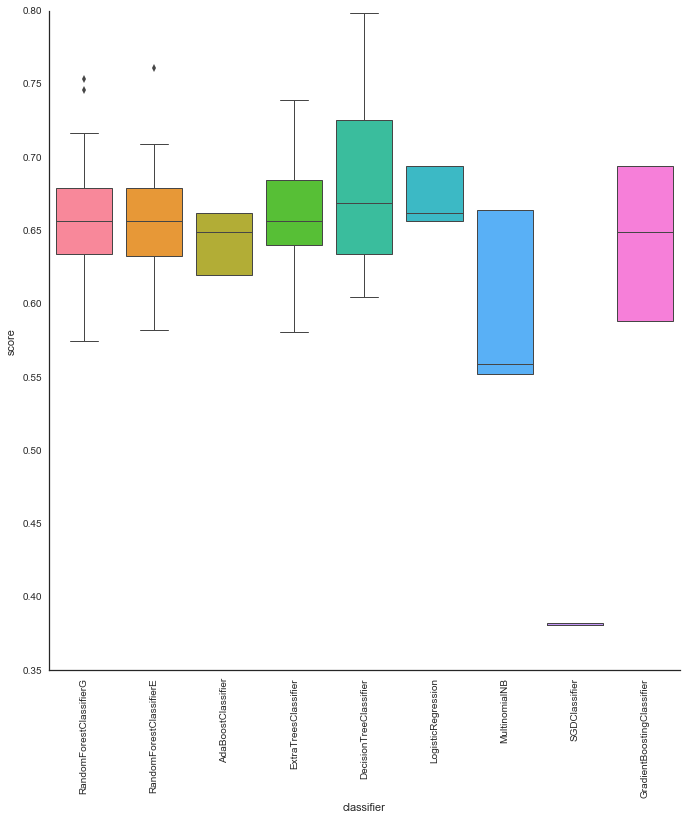

In [580]:
temp = pd.DataFrame(allscores, columns=['classifier', 'score'])
#sns.violinplot('classifier', 'score', data=temp, inner=None, linewidth=0.3)
plt.figure(figsize=(15,10))
sns.factorplot(x='classifier', 
               y="score",
               data=temp, 
               saturation=1, 
               kind="box", 
               ci=None, 
               aspect=1, 
               linewidth=1, 
               size = 10)     
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

In [586]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
#import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn import svm


df1 = data2
y = df1['is_duplicate'].values
df1 = df1.drop(['is_duplicate'],axis=1)
X = df1.values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.50)

radm = DecisionTreeClassifier()
radm.fit(Xtrain, ytrain)
y_val_l = radm.predict_proba(Xtest)

clf = radm
indices = np.argsort(radm.feature_importances_)[::-1]

# Print the feature ranking
print('Feature ranking:')

for f in range(df1.shape[1]):
    print('%d. feature %d %s (%f)' % (f+1 , indices[f], df1.columns[indices[f]],
                                      radm.feature_importances_[indices[f]]))

Feature ranking:
1. feature 12 INTERSECTION_UNION_FUZZ_RATIO_S (0.346452)
2. feature 9 Q2_UNION_FUZZ_RATIO_S (0.131991)
3. feature 8 Q1_UNION_FUZZ_RATIO_S (0.118564)
4. feature 2 Q1_UNION_FUZZ_RATIO (0.096476)
5. feature 6 INTERSECTION_UNION_FUZZ_RATIO (0.064554)
6. feature 5 Q2_INTERSECTION_FUZZ_RATIO (0.049974)
7. feature 3 Q2_UNION_FUZZ_RATIO (0.048486)
8. feature 10 Q1_INTERSECTION_FUZZ_RATIO_S (0.045181)
9. feature 4 Q1_INTERSECTION_FUZZ_RATIO (0.043012)
10. feature 11 Q2_INTERSECTION_FUZZ_RATIO_S (0.033007)
11. feature 1 Q1_Q2_FUZZ_RATIO (0.018476)
12. feature 0 id (0.003828)
13. feature 7 Q1_Q2_FUZZ_RATIO_S (0.000000)


In [587]:
pred = clf.predict_proba(X)

In [588]:
data['COMPUTER_IDENTIFICATION'] = pred[:,1]

In [589]:
predicted_data = data[data['COMPUTER_IDENTIFICATION']>0.6]
predicted_data.head(10)

,index,id,qid1,qid2,question1,question2,is_duplicate,question1_S,question2_S,Q1_WORDS,...,Q2_WORDS_S,Q1_Q2_FUZZ_RATIO_S,INTERSECTION_S,UNION_S,Q1_UNION_FUZZ_RATIO_S,Q2_UNION_FUZZ_RATIO_S,Q1_INTERSECTION_FUZZ_RATIO_S,Q2_INTERSECTION_FUZZ_RATIO_S,INTERSECTION_UNION_FUZZ_RATIO_S,COMPUTER_IDENTIFICATION
0,44710,44708,89028,89029,What are examples of demographic factors?,What are some examples of demographic factors?,1,"[examples, demographic, factors?]","[examples, demographic, factors?]","[What, are, examples, of, demographic, factors]",...,"[examples, demographic, factors?]",94,"{demographic, examples, factors?}","{demographic, examples, factors?}",48,45,48,45,100,1.0
1,222552,222546,438656,438657,What are 5 scientific challenges faced by big cities due to the urban congestion?,What are 5 scientific challenges faced by big cities due to urbanization?,1,"[5, scientific, challenges, faced, big, cities, due, urban, congestion?]","[5, scientific, challenges, faced, big, cities, due, urbanization?]","[What, are, 5, scientific, challenges, faced, by, big, cities, due, to, the, urban, congestion]",...,"[5, scientific, challenges, faced, big, cities, due, urbanization?]",91,"{faced, scientific, big, due, challenges, 5, cities}","{faced, urban, congestion?, scientific, urbanization?, big, due, challenges, 5, cities}",25,29,39,41,78,1.0
9,5934,5933,11856,11857,Hillary nothingburger Clinton?,Hillary Clinton nothingburger?,1,"[hillary, nothingburger, clinton?]","[hillary, clinton, nothingburger?]","[Hillary, nothingburger, Clinton]",...,"[hillary, clinton, nothingburger?]",73,{hillary},"{nothingburger?, hillary, clinton, nothingburger, clinton?}",39,28,26,26,35,1.0
10,66359,66356,131925,131926,How many times in a day a women need sex?,How many times can a women have sex in one day?,1,"[many, times, day, women, need, sex?]","[many, times, women, sex, one, day?]","[How, many, times, in, a, day, a, women, need, sex]",...,"[many, times, women, sex, one, day?]",70,"{many, women, times}","{one, day?, many, sex, times, need, sex?, day, women}",40,30,27,25,40,1.0
11,23414,23412,46711,46712,What would happen when I die?,What will happen after I die?,1,"[would, happen, die?]","[happen, die?]","[What, would, happen, when, I, die]",...,"[happen, die?]",79,"{happen, die?}","{happen, die?, would}",41,38,48,44,83,1.0
12,295759,295749,580946,580947,"If Hillary Clinton wins the election, what does she see as the single most important thing that she should do?",What is the single most important thing Hillary Clinton must do to win the presidential election?,0,"[hillary, clinton, wins, election,, see, single, important, thing, do?]","[single, important, thing, hillary, clinton, must, win, presidential, election?]","[If, Hillary, Clinton, wins, the, election, what, does, she, see, as, the, single, most, important, thing, that, she, should, do]",...,"[single, important, thing, hillary, clinton, must, win, presidential, election?]",45,"{thing, single, important, clinton, hillary}","{election?, clinton, see, wins, election,, single, thing, hillary, important, do?, win, presidential, must}",35,39,29,37,46,1.0
13,62752,62750,124793,124794,What is unusual or different about the food and cuisine in SÃ£o TomÃ© and PrÃ­ncipe?,What is unusual or different about the food and cuisine in Malawi?,0,"[unusual, different, food, cuisine, sã£o, tomã©, prã­ncipe?]","[unusual, different, food, cuisine, malawi?]","[What, is, unusual, or, different, about, the, food, and, cuisine, in, So, Tom, and, Prncipe]",...,"[unusual, different, food, cuisine, malawi?]",86,"{food, cuisine, unusual, different}","{cuisine, unusual, food, malawi?, sã£o, different, tomã©, prã­ncipe?}",38,36,34,37,51,1.0
17,253370,253363,498754,498755,What 's your favorite book?,What is your all time favorite book?,1,"['s, favorite, book?]","[time, favorite, book?]","[What, 's, your, favorite, book]",...,"[time, favorite, book?]",83,"{favorite, book?}","{favorite, time, 's, book?}",45,40,58,50,78,1.0
23,337224,3372

In [1]:
stop = time.time()
stop - start 

NameError: name 'time' is not defined